In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib  import cm
from matplotlib.colors import LogNorm, Normalize


In [2]:
k = 25
mu = 1


def T_wrap_sphere(R,W,mu,k,sigma):
    t1 = np.multiply(R,mu)
    t2 = np.multiply(R**3,mu)
    v1 = np.divide(W, t1)
    v2 = np.divide(2*k, t2)
    v_up = np.add(v1, -v2)
    v_sigma = np.divide(sigma,t1)
    OVA = np.divide(2*v_sigma,v_up)
    sqrt= np.sqrt(1-OVA)
    denom= np.multiply(v_up,sqrt)
    
    Time_wrap = np.divide(np.pi, denom)
    
    return Time_wrap

def W_Rcrit(k,R):
    Rsq = R**2
    W = np.divide(k,Rsq)
    
    return W
def sigma_crit(W,R,k):
    Rsq = R**2
    term = np.add(2,2*np.pi)
    t2 = np.divide(2*k,Rsq)
    t3 = np.divide(term*k,Rsq)
    sigma_crit = 0.5*(W-t2)
    sigma_crit2 = 0.5*(W-t3)
    
    return sigma_crit, sigma_crit2

def T_full(R,W,mu,k,sigma):
    t1 = np.multiply(R,mu)
    t2 = np.multiply(R**3,mu)
    v1 = np.divide(W, t1)
    v2 = np.divide(2*k, t2)
    v_up = np.add(v1, -v2)
    Neck = np.divide(2*np.pi*k,t2)
    v_upEfDmb = np.add(v_up,-Neck)
    v_sigma = np.divide(sigma,t1)
    OVA = np.divide(2*v_sigma,v_up)
    OVADmb = np.divide(2*v_sigma,v_upEfDmb)
    sqrt= np.sqrt(1-OVA)
    sqrtDmb= np.sqrt(1-OVADmb)
    denom= np.multiply(v_up,sqrt)
    denomDmb= np.multiply(v_upEfDmb,sqrtDmb)
    tanpi = np.tan(np.pi/2)
    t3 = np.multiply(sqrt,tanpi)
    t3Dmb = np.multiply(sqrtDmb,tanpi)
    numer = 2*np.arctan(t3)
    numerDmb = 2*np.arctan(t3Dmb)

    Time_wrapSph = np.divide(numer,denom) #full time wrap of sphere
    Time_wrapDmb = np.divide(numerDmb,denomDmb) #full time wrap of sphere
    
    
    return Time_wrapSph, Time_wrapDmb

/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_8166/1097830381.py:47: RuntimeWarning: invalid value encountered in sqrt
  sqrtDmb= np.sqrt(1-OVADmb)


Text(0.5, 1.0, 'With diverging term and without')

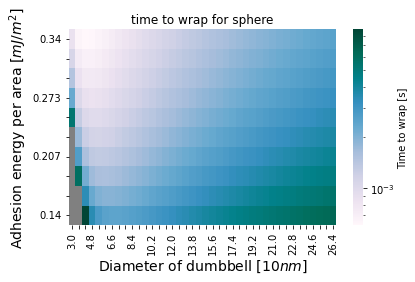

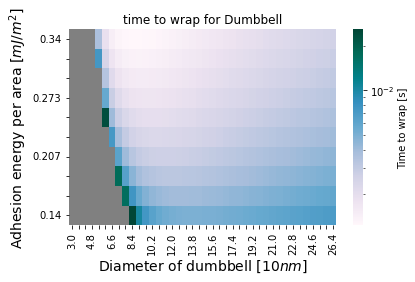

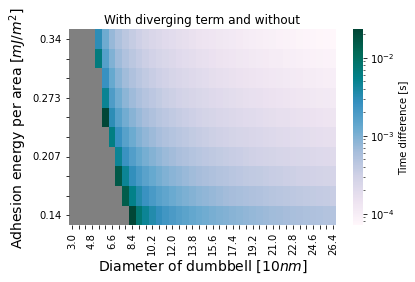

In [4]:
fig,ax = plt.subplots()
mu = 1


no_w = 10 #30
no_r = 40
Rs = []
Ws = []
Times_RW = np.zeros((no_w, no_r))
Times_full = np.zeros((no_w, no_r))
Times_diff = np.zeros((no_w, no_r))

Ws = []

k = 10**-16*10**-3
R = 30*10**-9
W = 0.02*10**-3 #(50kBT/(R**2) where R = 5)
sigma = 0.009*10**-3
Wcrit = []

for j in range(no_w):
    W_j = 7*W + W*j/.9 #/3
    Ws.append(W_j)
    Rs = []
    Wcrit = []
    for i in range(no_r):
        R_i = R + R*i/5
        Wcrit.append(W_Rcrit(k,R_i))
        Rs.append(R_i)
        
        if W_j > W_Rcrit(k,R_i) and sigma < sigma_crit(W_j,R_i,k)[0]:
            Time =  T_full(R_i,W_j,mu,k,sigma)[0]
           
            Time_full = T_full(R_i,W_j,mu,k,sigma)[1] 
            Times_RW[j,i] = Time
            Times_full[j,i] = Time_full
            Times_diff[j,i] = Time_full - Time
        else:
            Times_RW[j,i] = None
            Times_full[j,i] = None
            Times_diff[j,i] = None 
        if Times_full[j,i]<0:
            Times_full[j,i]=None

Ws__ = np.multiply(Ws,10**3)
Ws_ = np.round(Ws__,3)
Rs__ = np.multiply(Rs,10**8)
Rs_ = np.round(Rs__,1)
ax= sns.heatmap(Times_RW,xticklabels=Rs_, yticklabels=Ws_,cmap="PuBuGn", norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
ax.invert_yaxis()
ax.set_xlabel(r"Diameter of dumbbell [$10nm$]", fontsize = 14)  
ax.set_ylabel(r"Adhesion energy per area [$mJ/m^{2}$]", fontsize = 14)
plt.gcf().subplots_adjust(bottom=0.2)
ax.set_facecolor('grey')
ax.set_title("time to wrap for sphere")
#fig.savefig('./plots/Theory/HeatmapFull.png')
n = 3  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]
#fig.savefig('./plots/Theory/CorrectUnits/FullTimeHeatplotSphere.png')


fig2,ax2 = plt.subplots()
ax2= sns.heatmap(Times_full,xticklabels=Rs_, yticklabels=Ws_,cmap="PuBuGn", norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
ax2.invert_yaxis()
ax2.set_facecolor('grey')
ax2.set_title("time to wrap for Dumbbell")
ax2.set_xlabel(r"Diameter of dumbbell [$10nm$]", fontsize = 14)  
ax2.set_ylabel(r"Adhesion energy per area [$mJ/m^{2}$]", fontsize = 14)
plt.gcf().subplots_adjust(bottom=0.2)

n = 3  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax2.yaxis.get_ticklabels()) if i % n != 0]
#fig2.savefig('./plots/Theory/CorrectUnits/FullTimeHeatplotDmbll.png')

fig3,ax3 = plt.subplots()
ax3= sns.heatmap(Times_diff,xticklabels=Rs_, yticklabels=Ws_,cmap="PuBuGn", norm=LogNorm(),cbar_kws={'label': r'Time difference [s]'})
ax3.invert_yaxis()
[l.set_visible(False) for (i,l) in enumerate(ax3.xaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax3.yaxis.get_ticklabels()) if i % n != 0]
ax3.set_xlabel(r"Diameter of dumbbell [$10nm$]", fontsize = 14)  
ax3.set_ylabel(r"Adhesion energy per area [$mJ/m^{2}$]", fontsize = 14)
ax3.set_facecolor('grey')
plt.gcf().subplots_adjust(bottom=0.2)

ax3.set_title("With diverging term and without")
#fig3.savefig('/Plots/FullTimeHeatplotDiff.png')
#fig3.savefig('./plots/Theory/TimeDiffBdiv0.02.png')


[[       nan        nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan 0.00731678]
 [       nan        nan        nan        nan 0.0236464  0.00405209]
 [       nan        nan        nan        nan 0.00570489 0.00281606]
 [       nan        nan        nan        nan 0.00338138 0.00216032]
 [       nan        nan        nan 0.00736912 0.00241126 0.001753  ]]


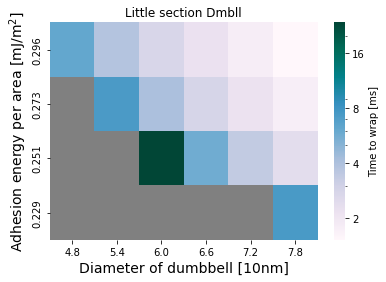

In [6]:
#fig,ax = plt.subplots()
#ax= sns.heatmap(Times_RW[10:17,10:15],xticklabels=Rs_[10:15], yticklabels=Ws_[10:17],cmap="PuBuGn",norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
#ax.invert_yaxis()
#ax.set_title("Little section Sphere")
#ax.set_facecolor('grey')
#ax.set_xlabel(r"Diameter of Sphere [10nm]", fontsize = 14)  
#ax.set_ylabel(r"Adhesion energy per area [$\mathrm{mJ}/\mathrm{m}^{2}$]", fontsize = 14)
#fig.savefig('./plots/Theory/CorrectUnits/LittleSectionSphere.png')

#fig.savefig('./plots/Theory/LittleSection.png')
fig2,ax2 = plt.subplots()
ax2 = sns.heatmap(np.transpose(Times_full[3:9,4:8]),xticklabels=Rs_[3:9], yticklabels=Ws_[4:8],cmap="PuBuGn",norm=LogNorm(),cbar_kws={'label': r'Time to wrap [ms]'})
ax2.invert_yaxis()
ax2.set_facecolor('grey')
#print(Times_full[5:17,10:15])
ax2.set_title("Little section Dmbll")
ax2.set_xlabel(r"Diameter of dumbbell [10nm]", fontsize = 14)  
print(Times_full[3:9,1:7])
ax2.set_ylabel(r"Adhesion energy per area [$\mathrm{mJ}/\mathrm{m}^{2}$]", fontsize = 14)
cbar = ax2.collections[0].colorbar
cbar.set_ticks([0.002,0.004,0.008,0.016])
cbar.set_ticklabels(['2', '4', '8','16'])
#fig2.savefig('./plots/Theory/CorrectUnits/LittleSectionDmbll_revision2.pdf')

#fig3,ax3 = plt.subplots()
#ax3= sns.heatmap(Times_diff[10:17,10:15],xticklabels=Rs_[10:15], yticklabels=Ws_[10:17],cmap="PuBuGn",norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
#ax3.invert_yaxis()
#ax3.set_facecolor('grey')

#ax3.set_title("Little section Diff")
#ax3.set_xlabel(r"Diameter of dumbbell [10nm]", fontsize = 14)  
#ax3.set_ylabel(r"Adhesion energy per area [$\mathrm{mJ}/\mathrm{m}^{2}$]", fontsize = 14)
#fig3.savefig('./plots/Theory/CorrectUnits/LittleSectionDiff.png')



# Tension

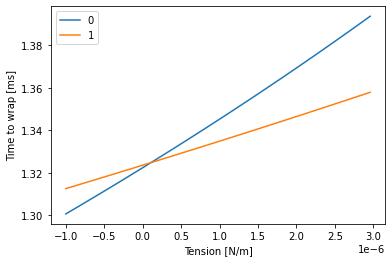

In [8]:
fig,ax = plt.subplots()

k = 10**-16*10**-3
R = 50*10**-9
R2 = 27*10**-9
W = 0.4*10**-3 #(50kBT/(R**2) where R = 5)
W2 = 1.174*10**-3
sigma = 0.001*10**-3

Rs = "25 50 27 35 40 45 50".split()
Ws = "1.3847 0.45 1.2 0.9 0.75 0.6 0.45".split()
mu=1
for j in range(2):
    #print(len(Tension), len(Times_T1))
    W = Ws[j]
    R = Rs[j]
    R = float(R)*10**-9
    W = float(W)*10**-3
    Times_T1 = []
    #Times_T2 = []
    Tension = []
    for i in range(100):
        tens = -sigma + i*sigma*2/50
        Tension.append(tens)
        Time =  T_full(R,W,mu,k,tens)[1]
        Times_T1.append(Time)
        Times_T1_ = np.multiply(Times_T1,10**3)
    #ax.plot(Tension,Times_T1_, label = r'Size = 50nm W = 0.4$\mathrm{mJ}/\mathrm{m}^{2}$', label = str(j))
    ax.plot(Tension,Times_T1_, label = str(j))

Times_T1_ = np.multiply(Times_T1,10**3)
#Times_T2_ = np.multiply(Times_T2,10**3)
Ys = np.linspace(1,max(Times_T1_),10)
Xs = np.ones(10)*sigma_crit(W,R,k)[1]
Ys2 = np.linspace(1,max(Times_T1_),10)
Xs2 = np.ones(10)*sigma_crit(W2,R2,k)[1]
#ax.plot(Xs,Ys, linestyle='--', label = r'Critical $\sigma$, no uptake', color = 'orange') 
#ax.plot(Xs2,Ys2, linestyle='--', label = r'Critical $\sigma$, no uptake', color = 'royalblue')        
##ax.plot(Tension,Times_T1_, label = r'Size = 50nm W = 0.4$\mathrm{mJ}/\mathrm{m}^{2}$', color = 'darkorange')
#ax.set_xlim(-sigma, sigma_crit(W,R,k)[1]+sigma_crit(W,R,k)[1]/10)
##ax.plot(Tension,Times_T2_, label = r'Size = 27nm W = 1.175$\mathrm{mJ}/\mathrm{m}^{2}$', color = 'tab:blue')
#ax.set_xlim(-sigma, sigma_crit(W2,R2,k)+sigma_crit(W2,R2,k)/10)

#ax.plot(Tension,Times_T2, label = r'100nm 8.5kBT/nm2')
ax.set_ylabel('Time to wrap [ms]')
ax.set_xlabel('Tension [N/m]')
ax.legend()
#fig.savefig('./plots/Theory/CorrectUnits/TimeVsTensionZoom.png')
#ax2.legend()

Text(0.5, 1.0, 'With diverging term and without')

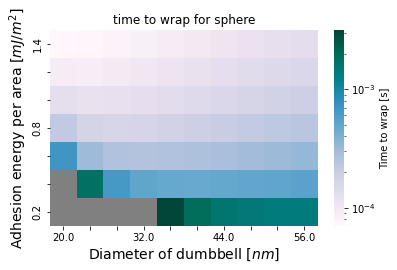

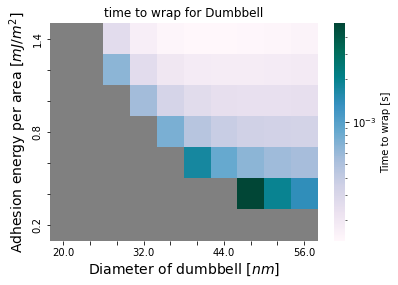

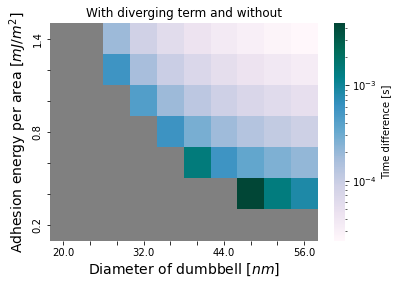

In [9]:
fig,ax = plt.subplots()
mu = 1


no_w = 7
no_r = 10
Rs = []
Ws = []
Times_RW = np.zeros((no_w, no_r))
Times_full = np.zeros((no_w, no_r))
Times_diff = np.zeros((no_w, no_r))

Ws = []

k = 10**-16*10**-3
R = 20*10**-9
W = 0.2*10**-3 #(50kBT/(R**2) where R = 5)
sigma = 0.009*10**-3
Wcrit = []

for j in range(no_w):
    W_j = W + W*j
    Ws.append(W_j)
    Rs = []
    Wcrit = []
    for i in range(no_r):
        R_i = R + R*i/5
        Wcrit.append(W_Rcrit(k,R_i))
        Rs.append(R_i)
        
        if W_j > W_Rcrit(k,R_i) and sigma < sigma_crit(W_j,R_i,k)[0]:
            Time =  T_full(R_i,W_j,mu,k,sigma)[0]
           
            Time_full = T_full(R_i,W_j,mu,k,sigma)[1] 
            Times_RW[j,i] = Time
            Times_full[j,i] = Time_full
            Times_diff[j,i] = Time_full - Time
        else:
            Times_RW[j,i] = None
            Times_full[j,i] = None
            Times_diff[j,i] = None 

Ws__ = np.multiply(Ws,10**3)
Ws_ = np.round(Ws__,3)
Rs__ = np.multiply(Rs,10**9)
Rs_ = np.round(Rs__,1)
ax= sns.heatmap(Times_RW,xticklabels=Rs_, yticklabels=Ws_,cmap="PuBuGn", norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
ax.invert_yaxis()
ax.set_xlabel(r"Diameter of dumbbell [$nm$]", fontsize = 14)  
ax.set_ylabel(r"Adhesion energy per area [$mJ/m^{2}$]", fontsize = 14)
plt.gcf().subplots_adjust(bottom=0.2)
ax.set_facecolor('grey')
ax.set_title("time to wrap for sphere")
#fig.savefig('./plots/Theory/HeatmapFull.png')
n = 3  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]
#fig.savefig('./plots/Theory/CorrectUnits/FullTimeHeatplotSphereSmDiam.png')


fig2,ax2 = plt.subplots()
ax2= sns.heatmap(Times_full,xticklabels=Rs_, yticklabels=Ws_,cmap="PuBuGn", norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
ax2.invert_yaxis()
ax2.set_facecolor('grey')
ax2.set_title("time to wrap for Dumbbell")
ax2.set_xlabel(r"Diameter of dumbbell [$nm$]", fontsize = 14)  
ax2.set_ylabel(r"Adhesion energy per area [$mJ/m^{2}$]", fontsize = 14)
n = 3  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax2.yaxis.get_ticklabels()) if i % n != 0]
#fig2.savefig('./plots/Theory/CorrectUnits/FullTimeHeatplotDmbllSmDiam.png')

fig3,ax3 = plt.subplots()
ax3= sns.heatmap(Times_diff,xticklabels=Rs_, yticklabels=Ws_,cmap="PuBuGn", norm=LogNorm(),cbar_kws={'label': r'Time difference [s]'})
ax3.invert_yaxis()
[l.set_visible(False) for (i,l) in enumerate(ax3.xaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax3.yaxis.get_ticklabels()) if i % n != 0]
ax3.set_xlabel(r"Diameter of dumbbell [$nm$]", fontsize = 14)  
ax3.set_ylabel(r"Adhesion energy per area [$mJ/m^{2}$]", fontsize = 14)
ax3.set_facecolor('grey')
ax3.set_title("With diverging term and without")
#fig3.savefig('./plots/Theory/CorrectUnits/FullTimeHeatplotDiffSmDiam.png')
#fig3.savefig('./plots/Theory/TimeDiffBdiv0.02.png')

Text(33.0, 0.5, 'Adhesion energy per area [$\\mathrm{mJ}/\\mathrm{m}^{2}$]')

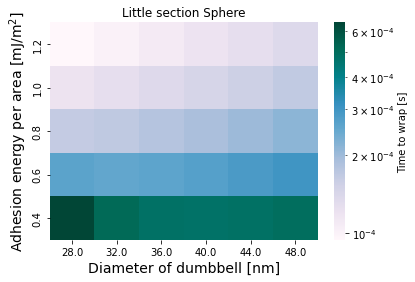

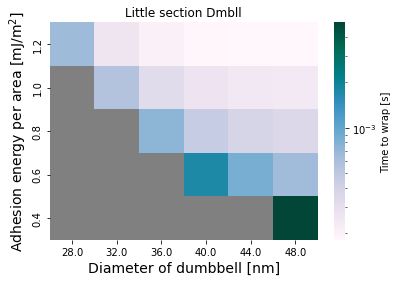

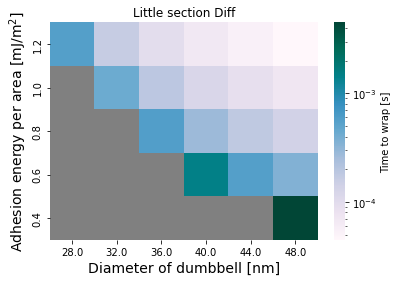

In [11]:
fig,ax = plt.subplots()
ax= sns.heatmap(Times_RW[1:6,2:8],xticklabels=Rs_[2:8], yticklabels=Ws_[1:6],cmap="PuBuGn",norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
ax.invert_yaxis()
ax.set_title("Little section Sphere")
ax.set_facecolor('grey')
ax.set_xlabel(r"Diameter of dumbbell [nm]", fontsize = 14)  
ax.set_ylabel(r"Adhesion energy per area [$\mathrm{mJ}/\mathrm{m}^{2}$]", fontsize = 14)
#fig.savefig('./plots/Theory/CorrectUnits/LittleSectionSphereSmDiam.png')

#fig.savefig('./plots/Theory/LittleSection.png')
fig2,ax2 = plt.subplots()
ax= sns.heatmap(Times_full[1:6,2:8],xticklabels=Rs_[2:8], yticklabels=Ws_[1:6],cmap="PuBuGn",norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
ax2.invert_yaxis()
ax2.set_facecolor('grey')

ax2.set_title("Little section Dmbll")
ax2.set_xlabel(r"Diameter of dumbbell [nm]", fontsize = 14)  

ax2.set_ylabel(r"Adhesion energy per area [$\mathrm{mJ}/\mathrm{m}^{2}$]", fontsize = 14)
#fig2.savefig('./plots/Theory/CorrectUnits/LittleSectionDmbllSmDiam.png')

fig3,ax3 = plt.subplots()
ax= sns.heatmap(Times_diff[1:6,2:8],xticklabels=Rs_[2:8], yticklabels=Ws_[1:6],cmap="PuBuGn",norm=LogNorm(),cbar_kws={'label': r'Time to wrap [s]'})
ax3.invert_yaxis()
ax3.set_facecolor('grey')

ax3.set_title("Little section Diff")
ax3.set_xlabel(r"Diameter of dumbbell [nm]", fontsize = 14)  
ax3.set_ylabel(r"Adhesion energy per area [$\mathrm{mJ}/\mathrm{m}^{2}$]", fontsize = 14)
#fig3.savefig('./plots/Theory/CorrectUnits/LittleSectionDiffSmDiam.png')


ValueError: operands could not be broadcast together with shapes (10,) (2,) 

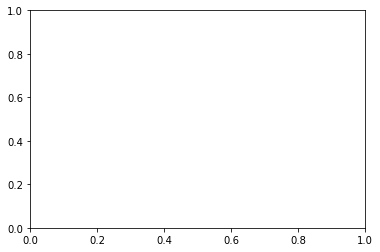

In [12]:
fig,ax = plt.subplots()

k = 10**-16*10**-3
R = 2.4*10**-9
W = 100*10**-2 #(50kBT/(R**2) where R = 5)
R2 = 4.4*10**-9
W2 = 4.28*10**-2 #(50kBT/(R**2) where R = 5)
sigma = 0.05*10**-3
mu=1
Times_T1 = []
Times_T2 = []
Tension = []

for i in range(20):
    #tens = -sigma + i*sigma/10
    tens = -sigma/1000 + i*sigma/10000
    Tension.append(tens)
    #if tens < sigma_crit(W,R,k):
    Time =  T_full(R,W,mu,k,tens)[1]
    Time2 =  T_full(R2,W2,mu,k,tens)[1]
    Times_T1.append(Time)
    Times_T2.append(Time2)

Times_T1_ = np.multiply(Times_T1,10**3)
Times_T2_ = np.multiply(Times_T2,10**3)
Ys = np.linspace(7,max(Times_T1_),10)
Xs = np.ones(10)*sigma_crit(W,R,k)
Ys2 = np.linspace(7,max(Times_T2_),10)
Xs2 = np.ones(10)*sigma_crit(W2,R2,k)

Tension_ = np.multiply(Tension, 10**9)
print(W)
print(Times_T2)
#ax.plot(Xs,Ys, linestyle='--', label = r'Critical $\sigma$, no uptake', color = 'orange') 
#ax.plot(Xs2,Ys2, linestyle='--', label = r'Critical $\sigma$, no uptake', color = 'royalblue')        
#ax.plot(Tension_,Times_T1_, label = r'Size = 2.5nm W = 33$\mathrm{mJ}/\mathrm{m}^{2}$', color = 'darkorange')
#ax.set_xlim(-sigma, sigma_crit(W,R,k)+sigma_crit(W,R,k)/10)
ax.plot(Tension_,Times_T2_, label = r'Size = 5nm W = 10$\mathrm{mJ}/\mathrm{m}^{2}$', color = 'tab:blue')
#ax.set_xlim(-sigma, sigma_crit(W2,R2,k)+sigma_crit(W2,R2,k)/10)

#ax.plot(Tension,Times_T2, label = r'100nm 8.5kBT/nm2')
ax.set_ylabel('Time to wrap [ms]')
ax.set_xlabel('Tension [$nN/m$]')
ax.legend()